## ARIMA Model
**Auto Regrative Intragrated Moving Average**

General Steps
* Visualize the time series data
* Make time series data stationary
* Plot the correlation and auto-correlation charts
* Construct the ARIMA model
* Use the model to make predicitons

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [16]:
df= pd.read_csv("monthly-milk-production-pounds-p.csv")

In [17]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [18]:
df.columns= ['Month', 'Milk']

In [19]:
df.dropna(inplace= True)

In [20]:
df['Month']= pd.to_datetime(df['Month'])

In [21]:
df.set_index("Month", inplace= True)

In [22]:
df.head()

,Milk
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
Milk    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


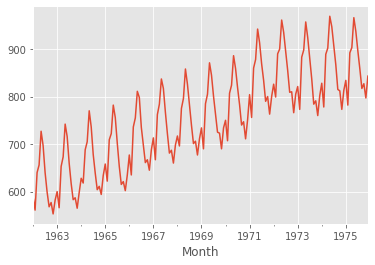

In [30]:
df['Milk'].plot()

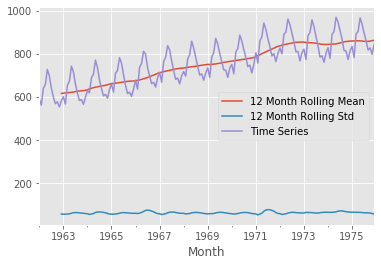

In [33]:
df['Milk'].rolling(12).mean().plot(label= "12 Month Rolling Mean")
df['Milk'].rolling(12).std().plot(label= "12 Month Rolling Std")
df['Milk'].plot(label= "Time Series")
plt.legend();

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
decomp= seasonal_decompose(df['Milk'])
# decomp= seasonal_decompose(df['Milk'], model= "multiplicative", freq= 12)

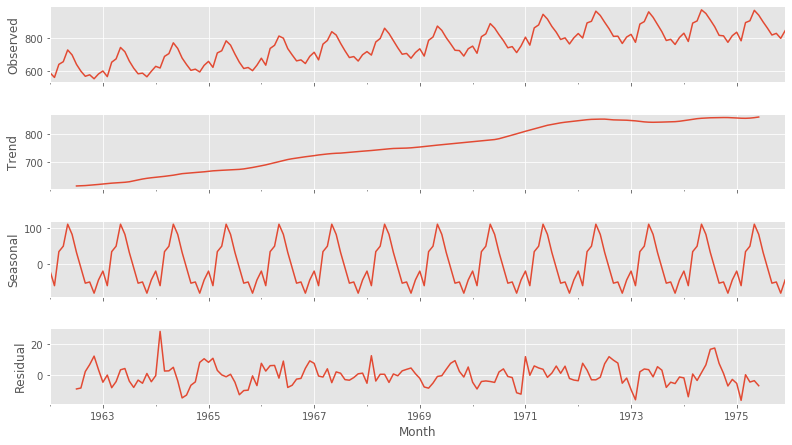

In [44]:
fig= decomp.plot();
fig.set_size_inches(12, 7)

#### Stationary Test

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
result= adfuller(df['Milk'])

In [54]:
def adf_check(ts):
    result= adfuller(ts)
    print("Augmented Dicky-Fuller Test")
    labels= ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    for value, label in zip(result, labels):
        print("{}: {}".format(label, value))
    if(result[1]<=0.05):
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence aginst null hypothesis")
        print("Failed to reject null hypothesis")
        print("\nData has a unit root and it is non-stationary")

In [55]:
adf_check(df['Milk'])

Augmented Dicky-Fuller Test
ADF Test Statistic: -1.3038115874221246
p-value: 0.627426708603034
# of lags: 13
Num of Observations used: 154
Weak evidence aginst null hypothesis
Failed to reject null hypothesis

Data has a unit root and it is non-stationary


#### Making data stationary using Differencing

In [57]:
df['First Difference']= df['Milk']- df['Milk'].shift(1)

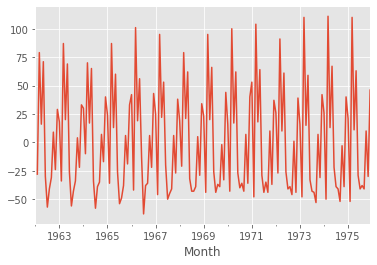

In [59]:
df['First Difference'].plot()

In [61]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -3.0549955586530553
p-value: 0.03006800400178688
# of lags: 14
Num of Observations used: 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [62]:
df['Second Difference']= df['First Difference']- df['First Difference'].shift(1)

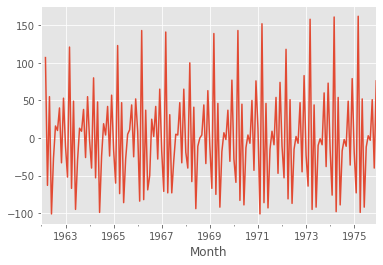

In [63]:
df['Second Difference'].plot()

In [64]:
adf_check(df['Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -14.327873645603336
p-value: 1.1126989332083069e-26
# of lags: 11
Num of Observations used: 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


#### Seasonal Difference

In [65]:
df['Seasonal Difference']= df['Milk']- df['Milk'].shift(12)

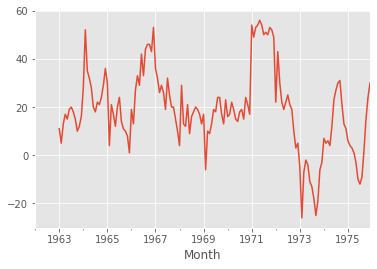

In [66]:
df['Seasonal Difference'].plot()

In [67]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -2.3354193143593993
p-value: 0.16079880527711304
# of lags: 12
Num of Observations used: 143
Weak evidence aginst null hypothesis
Failed to reject null hypothesis

Data has a unit root and it is non-stationary


In [68]:
df['Seasonal First Difference']= df['First Difference']- df['First Difference'].shift(12)

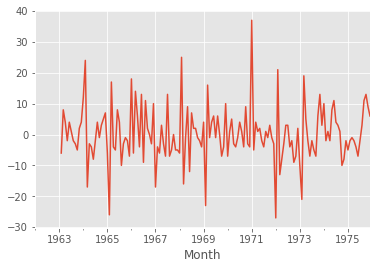

In [69]:
df['Seasonal First Difference'].plot()

In [70]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic: -5.038002274921985
p-value: 1.86542343187882e-05
# of lags: 11
Num of Observations used: 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [71]:
 df.head()

,Milk,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference
Month,,,,,
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN


### AutoCorrelation & Partial AutoCorrelation Plots

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

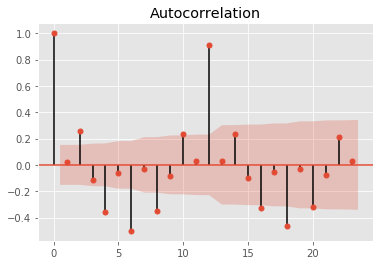

In [78]:
_= plot_acf(df['First Difference'].dropna())

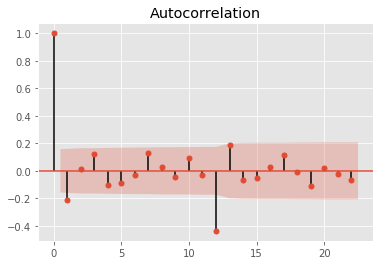

In [79]:
_= plot_acf(df['Seasonal First Difference'].dropna())

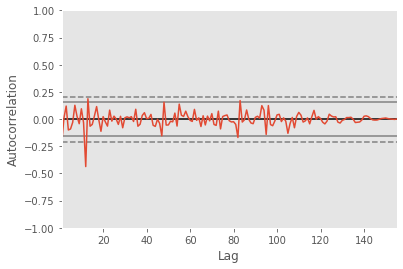

In [82]:
# Pandas also offer AutoCorrelation but not Partial AutoCorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

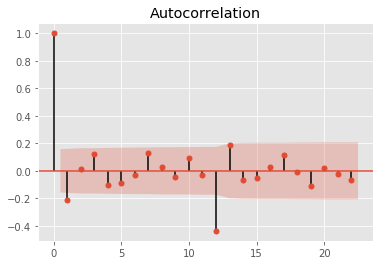

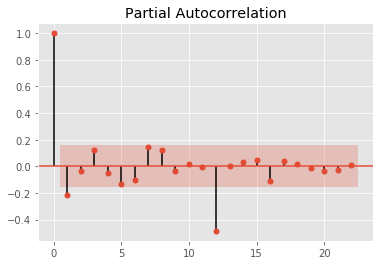

In [88]:
_= plot_acf(df['Seasonal First Difference'].dropna())
_= plot_pacf(df['Seasonal First Difference'].dropna())

### Construct ARIMA Model

In [89]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
# Seasonal ARIMA Model
model= sm.tsa.statespace.SARIMAX(df['Milk'], 
                          order= (0, 1, 0), 
                          seasonal_order=(1, 1, 1, 12))

C:\Users\10650637\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [92]:
result= model.fit()

In [93]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Milk   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Tue, 24 Mar 2020   AIC                           1074.131
Time:                                    22:07:37   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

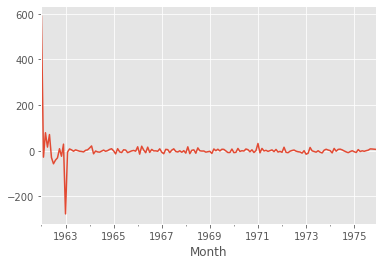

In [109]:
# Residual mean if this model would have predicted this time series, what whould be error throughtout
# residual= real - predicted
result.resid.plot();

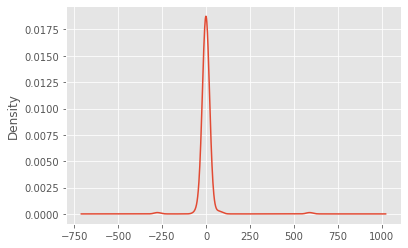

In [103]:
# most of the error are 0 that is good, see below
result.resid.plot(kind= "kde");

#### Forecasting :)

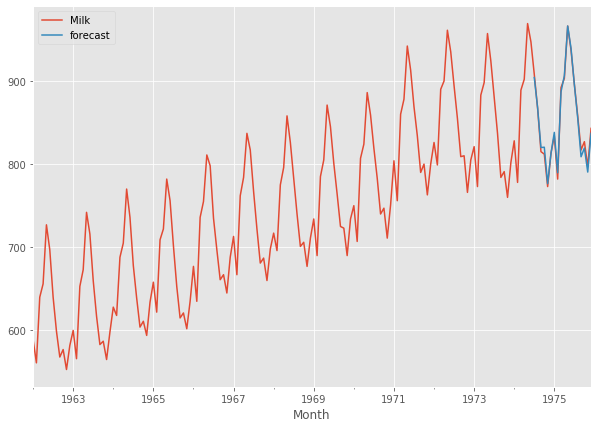

In [107]:
df['forecast']= result.predict(start= 150, end= 168)
df[['Milk', 'forecast']].plot(figsize= (10, 7));

In [108]:
df.tail()

,Milk,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841371
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427529
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [110]:
from pandas.tseries.offsets import DateOffset

In [112]:
future_dates= [df.index[-1] + DateOffset(months= x) for x in range(1, 25)]

In [113]:
future_dates[:2]

[Timestamp('1976-01-01 00:00:00'), Timestamp('1976-02-01 00:00:00')]

In [114]:
future_df= pd.DataFrame(index= future_dates, columns= df.columns)

In [116]:
future_df.head()

,Milk,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
final_df= pd.concat([df, future_df])

In [119]:
final_df.shape

(192, 6)

In [120]:
final_df.tail()

,Milk,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-12-01,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
final_df['forecast']= result.predict(start= 168, end= 192)

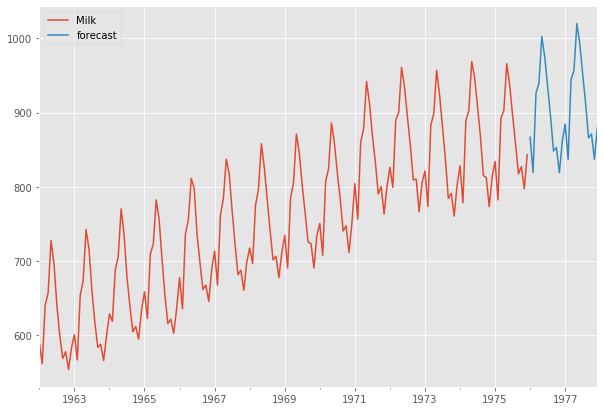

In [122]:
final_df[['Milk', 'forecast']].plot(figsize= (10, 7));

#### DONE